In [61]:
# import basic packages
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

import pypfopt
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

import yfinance as yf
# importing FinQuant's function to automatically build the portfolio
from finquant.portfolio import build_portfolio

In [62]:
# get the S&P 500
table=pd.read_html('https://en.wikipedia.org/wiki/list_of_S%26P_500_companies')
df = table[0]
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [63]:
df['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [64]:
stocks_top50 = pd.read_csv('/home/nanwang/github/Fin/Top50.csv')
list_top50 = stocks_top50['Ticker'].tolist()
list_top50

['NVDA',
 'POOL',
 'CRM',
 'WST',
 'VRTX',
 'ADBE',
 'CDNS',
 'IRBT',
 'FIX',
 'LRCX',
 'INTU',
 'BBY',
 'BLK',
 'EXPD',
 'DECK',
 'MSFT',
 'AMAT',
 'IDXX',
 'TDOC',
 'RCM',
 'HBI',
 'HD',
 'PWR',
 'BCC',
 'A',
 'TROW',
 'FAST',
 'BWXT',
 'MTD',
 'PLD',
 'FDS',
 'EW',
 'PG',
 'RMD',
 'ZBRA',
 'KMB',
 'CMI',
 'GWW',
 'TRMB',
 'MLHR',
 'CLX',
 'BEAT',
 'EQIX',
 'TVTY',
 'KSU',
 'TXN',
 'PETQ',
 'DGX',
 'CHRW',
 'PDCO']

In [65]:
tickers = list_top50 + ['^GSPC']
benchmark = ['^GSPC']

start_date = '2018-1-1'  # start day for lookback
end_date = '2021-1-1'  # end day for lookback

ohlc = yf.download(tickers,start=start_date, end=end_date)
ohlc.head()


[*********************100%***********************]  51 of 51 completed


Adj Close                                                          \
                   A        ADBE       AMAT        BBY        BCC       BEAT   
Date                                                                           
2018-01-02      0.39  177.699997  50.576756  63.819813  34.555893  30.450001   
2018-01-03      0.39  181.039993  51.473106  63.118492  35.090961  30.600000   
2018-01-04      0.39  183.220001  51.768707  62.084965  34.868015  31.200001   
2018-01-05      0.39  185.339996  52.064312  63.552189  35.715195  31.400000   
2018-01-08      0.39  185.039993  53.323009  64.308876  36.651543  29.750000   

                                                         ...   Volume  \
                   BLK       BWXT       CDNS       CHRW  ...      RMD   
Date                                                     ...            
2018-01-02  469.751709  58.294701  42.049999  83.744781  ...      0.0   
2018-01-03  474.707947  58.805126  42.930000  83.511482  ...  10000.0   
2018-01-04  480.974701  58.805126  43.580002  83.726105  ...      0.0   
2018-01-05  485.072662  59.171085  43.990002  83.586143  ...      0.0   
2018-01-08  488.690521  59.691154  44.919998  84.715302  ...   9000.0   

                                                                         \
               TDOC     TRMB     TROW    TVTY      TXN     VRTX     WST   
Date                                                                      
2018-01-02   783900   879400  1603500  633800  4236200  1382000  335000   
2018-01-03   783300   948400  1169800  311200  6918900  1604000  194400   
2018-01-04  1137800  1558800   773500  465300  5460400  1345100  367500   
2018-01-05   971000   759000  1073300  368600  5254900  1940000  156600   
2018-01-08  2553400   880600  1675600  313800  4549400  1987000  153900   

                                
              ZBRA       ^GSPC  
Date                            
2018-01-02  310600  3367250000  
2018-01-03  253000  3538660000  
2018-01-04  435200  3695260000  
2018-01-05  301800  3236620000  
2018-01-08  218600  3242650000  

[5 rows x 306 columns]

In [66]:
prices = ohlc["Adj Close"]

pf = build_portfolio(data=prices)
pf.data.head()

,A,ADBE,AMAT,BBY,BCC,BEAT,BLK,BWXT,CDNS,CHRW,...,RMD,TDOC,TRMB,TROW,TVTY,TXN,VRTX,WST,ZBRA,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.39,177.699997,50.576756,63.819813,34.555893,30.450001,469.751709,58.294701,42.049999,83.744781,...,0.07,36.200001,41.060001,94.850662,36.650002,96.645950,152.910004,98.066849,103.709999,2695.810059
2018-01-03,0.39,181.039993,51.473106,63.118492,35.090961,30.600000,474.707947,58.805126,42.930000,83.511482,...,0.06,36.849998,42.189999,96.148094,36.400002,99.264198,152.009995,98.185112,105.769997,2713.060059
2018-01-04,0.39,183.220001,51.768707,62.084965,34.868015,31.200001,480.974701,58.805126,43.580002,83.726105,...,0.06,37.200001,42.849998,96.902626,36.599998,99.136017,153.070007,98.155556,107.860001,2723.989990
2018-01-05,0.39,185.339996,52.064312,63.552189,35.715195,31.400000,485.072662,59.171085,43.990002,83.586143,...,0.06,37.500000,43.000000,98.669342,36.349998,99.895859,155.690002,99.387543,109.540001,2743.149902
2018-01-08,0.39,185.039993,53.323009,64.308876,36.651543,29.750000,488.690521,59.691154,44.919998,84.715302,...,0.06,36.049999,43.009998,101.107780,36.299999,100.371918,156.889999,99.949333,110.629997,2747.709961


In [67]:
# Risk free rate
pf.risk_free_rate = 0.1
# Time window/frequency
pf.freq = 252

In [68]:
# ## Getting Skewness and Kurtosis of the stocks
print('Skewness of the stocks')
print(pf.skew)
print()
print('Kurtosis of the stocks')
print(pf.kurtosis)

Skewness of the stocks
A        1.706370
ADBE     0.928229
AMAT     0.780266
BBY      1.162190
BCC     -0.009258
BEAT     0.600525
BLK      0.950733
BWXT    -0.651114
CDNS     0.793611
CHRW     0.018358
CLX      0.721110
CMI      0.674120
CRM      1.214007
DECK     0.939867
DGX      0.183990
EQIX     0.536646
EW      -0.005265
EXPD     0.796557
FAST     0.778535
FDS      0.373040
FIX     -0.518337
GWW      0.772956
HBI     -0.518714
HD       0.671118
IDXX     1.240162
INTU     0.288103
IRBT     0.387895
KMB     -0.033137
KSU      0.806740
LRCX     1.118642
MLHR    -0.298095
MSFT     0.580387
MTD      1.154535
NVDA     1.239342
PDCO     0.958707
PETQ     0.160698
PG      -0.020313
PLD      0.274234
POOL     1.147070
PWR      2.067019
RCM      1.131974
RMD     -0.060446
TDOC     0.959814
TRMB     1.290607
TROW     0.646803
TVTY     0.336194
TXN      0.952732
VRTX     0.821674
WST      1.108832
ZBRA     0.876837
^GSPC    0.737355
dtype: float64

Kurtosis of the stocks
A        3.100768
AD

In [69]:
pf.comp_cumulative_returns().head()

,A,ADBE,AMAT,BBY,BCC,BEAT,BLK,BWXT,CDNS,CHRW,...,RMD,TDOC,TRMB,TROW,TVTY,TXN,VRTX,WST,ZBRA,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-03,0.0,0.018796,0.017723,-0.010989,0.015484,0.004926,0.010551,0.008756,0.020927,-0.002786,...,-0.142857,0.017956,0.027521,0.013679,-0.006821,0.027091,-0.005886,0.001206,0.019863,0.006399
2018-01-04,0.0,0.031064,0.023567,-0.027184,0.009032,0.024631,0.023891,0.008756,0.036385,-0.000223,...,-0.142857,0.027624,0.043595,0.021634,-0.001364,0.025765,0.001046,0.000905,0.040015,0.010453
2018-01-05,0.0,0.042994,0.029412,-0.004193,0.033549,0.031199,0.032615,0.015034,0.046136,-0.001894,...,-0.142857,0.035912,0.047248,0.040260,-0.008186,0.033627,0.018181,0.013467,0.056214,0.017561
2018-01-08,0.0,0.041306,0.054299,0.007663,0.060645,-0.022989,0.040317,0.023955,0.068252,0.011589,...,-0.142857,-0.004144,0.047491,0.065968,-0.009550,0.038553,0.026028,0.019196,0.066725,0.019252


In [70]:
pf.comp_mean_returns().to_frame().T

,A,ADBE,AMAT,BBY,BCC,BEAT,BLK,BWXT,CDNS,CHRW,...,RMD,TDOC,TRMB,TROW,TVTY,TXN,VRTX,WST,ZBRA,^GSPC
0,0.677331,0.414037,0.285374,0.230963,0.20888,0.410265,0.200382,0.068544,0.456218,0.077452,...,1.510331,0.739954,0.239933,0.214062,0.099368,0.233523,0.212489,0.399758,0.52886,0.13815


In [71]:
pf.comp_daily_log_returns().head()

,A,ADBE,AMAT,BBY,BCC,BEAT,BLK,BWXT,CDNS,CHRW,...,RMD,TDOC,TRMB,TROW,TVTY,TXN,VRTX,WST,ZBRA,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.000000,0.018621,0.017567,-0.011050,0.015365,0.004914,0.010495,0.008718,0.020712,-0.002790,...,-0.154151,0.017796,0.027149,0.013586,-0.006845,0.026731,-0.005903,0.001205,0.019668,0.006378
2018-01-04,0.000000,0.011970,0.005726,-0.016510,-0.006374,0.019418,0.013115,0.000000,0.015027,0.002567,...,0.000000,0.009453,0.015522,0.007817,0.005479,-0.001292,0.006949,-0.000301,0.019567,0.004021
2018-01-05,0.000000,0.011504,0.005694,0.023358,0.024006,0.006390,0.008484,0.006204,0.009364,-0.001673,...,0.000000,0.008032,0.003495,0.018068,-0.006854,0.007635,0.016971,0.012473,0.015456,0.007009
2018-01-08,0.000000,-0.001620,0.023888,0.011836,0.025879,-0.053979,0.007431,0.008751,0.020921,0.013418,...,0.000000,-0.039434,0.000232,0.024413,-0.001376,0.004754,0.007678,0.005637,0.009901,0.001661
2018-01-09,0.097639,0.008931,-0.019138,0.001291,0.008480,0.010034,0.008369,-0.009891,0.003334,0.007463,...,0.000000,-0.043948,-0.003494,0.016875,0.000000,0.006817,-0.005625,0.008836,0.030183,0.001302


In [72]:
# daily percentage changes of returns
pf.comp_daily_returns().head()

,A,ADBE,AMAT,BBY,BCC,BEAT,BLK,BWXT,CDNS,CHRW,...,RMD,TDOC,TRMB,TROW,TVTY,TXN,VRTX,WST,ZBRA,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.000000,0.018796,0.017723,-0.010989,0.015484,0.004926,0.010551,0.008756,0.020927,-0.002786,...,-0.142857,0.017956,0.027521,0.013679,-0.006821,0.027091,-0.005886,0.001206,0.019863,0.006399
2018-01-04,0.000000,0.012042,0.005743,-0.016374,-0.006353,0.019608,0.013201,0.000000,0.015141,0.002570,...,0.000000,0.009498,0.015644,0.007848,0.005494,-0.001291,0.006973,-0.000301,0.019760,0.004029
2018-01-05,0.000000,0.011571,0.005710,0.023633,0.024297,0.006410,0.008520,0.006223,0.009408,-0.001672,...,0.000000,0.008064,0.003501,0.018232,-0.006831,0.007665,0.017116,0.012551,0.015576,0.007034
2018-01-08,0.000000,-0.001619,0.024176,0.011907,0.026217,-0.052548,0.007458,0.008789,0.021141,0.013509,...,0.000000,-0.038667,0.000233,0.024713,-0.001375,0.004766,0.007708,0.005653,0.009951,0.001662
2018-01-09,0.102564,0.008971,-0.018956,0.001291,0.008516,0.010084,0.008404,-0.009842,0.003339,0.007491,...,0.000000,-0.042996,-0.003488,0.017019,0.000000,0.006840,-0.005609,0.008875,0.030643,0.001303


In [73]:
# cumulative returns (price_{t} - price_{t=0}) / price_{t=0}
pf.comp_cumulative_returns().head()

,A,ADBE,AMAT,BBY,BCC,BEAT,BLK,BWXT,CDNS,CHRW,...,RMD,TDOC,TRMB,TROW,TVTY,TXN,VRTX,WST,ZBRA,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-03,0.0,0.018796,0.017723,-0.010989,0.015484,0.004926,0.010551,0.008756,0.020927,-0.002786,...,-0.142857,0.017956,0.027521,0.013679,-0.006821,0.027091,-0.005886,0.001206,0.019863,0.006399
2018-01-04,0.0,0.031064,0.023567,-0.027184,0.009032,0.024631,0.023891,0.008756,0.036385,-0.000223,...,-0.142857,0.027624,0.043595,0.021634,-0.001364,0.025765,0.001046,0.000905,0.040015,0.010453
2018-01-05,0.0,0.042994,0.029412,-0.004193,0.033549,0.031199,0.032615,0.015034,0.046136,-0.001894,...,-0.142857,0.035912,0.047248,0.040260,-0.008186,0.033627,0.018181,0.013467,0.056214,0.017561
2018-01-08,0.0,0.041306,0.054299,0.007663,0.060645,-0.022989,0.040317,0.023955,0.068252,0.011589,...,-0.142857,-0.004144,0.047491,0.065968,-0.009550,0.038553,0.026028,0.019196,0.066725,0.019252


In [74]:
from finquant.moving_average import sma
from finquant.moving_average import ema

In [75]:
benchmark_ann_ret = pf.comp_cumulative_returns().tail(1)['^GSPC']
benchmark_ann_ret

Date
2020-12-31    0.393299
Name: ^GSPC, dtype: float64

In [76]:
# 1. The current stock price is above both the 150-day and 200-day moving average
# 2. The 150-day moving average is above the 200-day moving average
# 3. The 200-day moving average line is trending up for at least 1 month
# 4. The 50-day moving average is above both the 150-day and 200-day moving averages
# 5. The current stock price is trading above the 50-day moving average
# 6. The current stock price is at least 30% above it’s 52-week low
# 7. The current stock price is within at least 25% of its 52-week high
# 8. The relative strength ranking (as reported in Investor’s Business Daily) is no less than 70. Preferably in the 80s or 90s.

# select stocks function
def screen(close: pd.Series, benchmark_ann_ret: float) -> pd.Series:
    # EMA 50,150,200
    ema_50 = ema(close, 50).iloc[-1]
    ema_150 = ema(close, 150).iloc[-1]
    ema_200 = ema(close, 200).iloc[-1]

    # The 20-day movement of the 200-day moving average is smooth to determine whether the 200-day moving average is rising
    ema_200_smooth = ema(ema(close, 200), 20).iloc[-1]

    # Closing 52-week highs and 52-week lows
    high_52week = close.rolling(52 * 5).max().iloc[-1]
    low_52week = close.rolling(52 * 5).min().iloc[-1]

    # Recent closing
    cl = float(close.iloc[-1])

    # 1. The current stock price is above both the 150-day and 200-day moving average
    if cl > ema_150 and cl > ema_200:
        condition_1 = True
    else:
        condition_1 = False

    # 2. The 150-day moving average is above the 200-day moving average
    if ema_150 > ema_200:
        condition_2 = True
    else:
        condition_2 = False

    # 3. The 200-day moving average line is trending up for at least 1 month
    if ema_200 > ema_200_smooth:
        condition_3 = True
    else:
        condition_3 = False

    # 4. The 50-day moving average is above both the 150-day and 200-day moving averages
    if ema_50 > ema_150 and ema_50 > ema_200:
        condition_4 = True
    else:
        condition_4 = False

    # 5. The current stock price is trading above the 50-day moving average
    if cl > ema_50:
        condition_5 = True
    else:
        condition_5 = False

    # 6. The current stock price is at least 30% above it’s 52-week low
    if cl >= low_52week * 1.3:
        condition_6 = True
    else:
        condition_6 = False

    # 7. The current stock price is within at least 25% of its 52-week high
    if cl >= high_52week * 0.75 and cl <= high_52week * 1.25:
        condition_7 = True
    else:
        condition_7 = False

    # 8. The relative strength ranking (as reported in Investor’s Business Daily) is no less than 70. Preferably in the 80s or 90s.
    rs = close.pct_change(252).iloc[-1] / float(benchmark_ann_ret) * 100
    if rs >= 70:
        condition_8 = True
    else:
        condition_8 = False


    # 判断股票是否符合标准
    if (condition_1 and condition_2 and condition_3 and
        condition_4 and condition_5 and condition_6 and
        condition_7 and condition_8):
        meet_criterion = True
    else:
        meet_criterion = False

    out = {
        "rs": round(rs, 2),
        "close": cl,
        "ema_50": ema_50,
        "ema_150": ema_150,
        "ema_200": ema_200,
        "high_52week": high_52week,
        "low_52week": low_52week,
        "meet_criterion": meet_criterion
    }

    return pd.Series(out)




,A,ADBE,AMAT,BBY,BCC,BEAT,BLK,BWXT,CDNS,CHRW,...,RMD,TDOC,TRMB,TROW,TVTY,TXN,VRTX,WST,ZBRA,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.877853,177.699997,50.576756,63.819813,34.555893,30.450001,469.751709,58.294701,42.049999,83.744781,...,82.547127,36.200001,41.060001,94.850662,36.650002,96.645950,152.910004,98.066849,103.709999,2695.810059
2018-01-03,67.554039,181.039993,51.473106,63.118492,35.090961,30.600000,474.707947,58.805126,42.930000,83.511482,...,83.406067,36.849998,42.189999,96.148094,36.400002,99.264198,152.009995,98.185112,105.769997,2713.060059
2018-01-04,67.047279,183.220001,51.768707,62.084965,34.868015,31.200001,480.974701,58.805126,43.580002,83.726105,...,83.521904,37.200001,42.849998,96.902626,36.599998,99.136017,153.070007,98.155556,107.860001,2723.989990
2018-01-05,68.119247,185.339996,52.064312,63.552189,35.715195,31.400000,485.072662,59.171085,43.990002,83.586143,...,84.631798,37.500000,43.000000,98.669342,36.349998,99.895859,155.690002,99.387543,109.540001,2743.149902
2018-01-08,68.265442,185.039993,53.323009,64.308876,36.651543,29.750000,488.690521,59.691154,44.919998,84.715302,...,85.114365,36.049999,43.009998,101.107780,36.299999,100.371918,156.889999,99.949333,110.629997,2747.709961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,61.487480,205.160004,28.089376,45.676483,20.331181,52.320000,342.330597,35.791866,40.310001,75.327629,...,101.341278,42.880001,30.160000,80.183228,24.180000,82.463837,151.910004,92.187881,142.899994,2351.100098
2018-12-26,64.303337,222.949997,29.688118,48.829517,21.287510,57.560001,360.744965,36.580532,42.590000,78.338448,...,106.588470,48.330002,31.480000,84.619507,24.770000,87.328995,161.839996,95.667236,152.520004,2467.699951
2018-12-27,65.225601,225.139999,30.569847,49.198799,21.839239,57.360001,366.961945,36.259228,43.410000,79.396049,...,108.800919,48.330002,32.070000,86.186340,24.920000,88.108559,162.369995,95.468964,155.350006,2488.830078


In [77]:
results = prices.apply(screen, benchmark_ann_ret=benchmark_ann_ret)
results = results.T
results


,rs,close,ema_50,ema_150,ema_200,high_52week,low_52week,meet_criterion
A,341.66,0.75,0.708861,0.625385,0.592892,NaN,NaN,False
ADBE,125.97,500.12,484.783,456.411,440.285,533.8,285,True
AMAT,103.27,86.3,79.0736,68.5676,65.8422,89.75,37.6025,True
BBY,44.16,99.79,107.07,101.944,98.3458,122.387,49.816,False
BCC,99.13,47.8,44.8745,40.9918,39.6155,49.55,19.7707,True
BEAT,136.68,72.08,57.848,49.7728,48.6427,72.22,28.93,True
BLK,115.41,721.54,675.873,611.123,589.809,721.54,321.674,True
BWXT,-10.02,60.28,58.5175,57.2013,56.9281,69.4589,41.6,False
CDNS,231.3,136.43,120.863,108.159,103.225,136.43,54.32,True
CHRW,59.84,93.87,93.6817,90.7935,88.9889,105.576,59.1116,False


In [78]:
meet_criterion = results[results['meet_criterion'] == True]
meet_criterion

,rs,close,ema_50,ema_150,ema_200,high_52week,low_52week,meet_criterion
ADBE,125.97,500.12,484.783,456.411,440.285,533.8,285,True
AMAT,103.27,86.3,79.0736,68.5676,65.8422,89.75,37.6025,True
BCC,99.13,47.8,44.8745,40.9918,39.6155,49.55,19.7707,True
BEAT,136.68,72.08,57.848,49.7728,48.6427,72.22,28.93,True
BLK,115.41,721.54,675.873,611.123,589.809,721.54,321.674,True
CDNS,231.3,136.43,120.863,108.159,103.225,136.43,54.32,True
DECK,169.26,286.78,272.567,236.273,224.58,304.27,91.16,True
FAST,90.45,48.83,47.8138,44.7478,43.3775,50.05,27.453,True
IDXX,225.31,499.87,457.939,402.194,382.648,499.87,182.94,True
INTU,111.37,379.242,358.021,329.254,319.48,380.55,193.317,True


In [79]:
portfolio = meet_criterion.T
portfolio

,ADBE,AMAT,BCC,BEAT,BLK,CDNS,DECK,FAST,IDXX,INTU,...,PDCO,PETQ,POOL,PWR,RCM,TDOC,TRMB,TXN,WST,ZBRA
rs,125.97,103.27,99.13,136.68,115.41,231.3,169.26,90.45,225.31,111.37,...,133.83,139.63,192.66,193.49,227.01,356.38,150.53,77.3,221.95,122.83
close,500.12,86.3,47.8,72.08,721.54,136.43,286.78,48.83,499.87,379.242,...,29.3979,38.45,372.5,72.02,24.02,199.96,66.77,163.141,283.149,384.33
ema_50,484.783,79.0736,44.8745,57.848,675.873,120.863,272.567,47.8138,457.939,358.021,...,29.2838,31.9269,347.716,66.9751,20.9077,199.896,60.4297,156.44,276.415,353.418
ema_150,456.411,68.5676,40.9918,49.7728,611.123,108.159,236.273,44.7478,402.194,329.254,...,25.8868,31.0586,316.687,56.7023,17.349,193.228,52.6169,143.293,257.656,306.043
ema_200,440.285,65.8422,39.6155,48.6427,589.809,103.225,224.58,43.3775,382.648,319.48,...,24.8392,30.7333,302.299,53.5141,16.3334,184.711,50.4307,138.896,245.539,292.457
high_52week,533.8,89.75,49.55,72.22,721.54,136.43,304.27,50.05,499.87,380.55,...,32.8407,38.45,383.229,73.0384,24.09,249.42,66.77,165.675,301.315,384.33
low_52week,285,37.6025,19.7707,28.93,321.674,54.32,91.16,27.453,182.94,193.317,...,12.4993,16.59,166.723,23.6885,7.57,81.43,21.32,90.9321,128.615,161.51
meet_criterion,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [80]:
tickers = portfolio.columns.to_list()
market_prices = prices[tickers]

market_prices.head()

,ADBE,AMAT,BCC,BEAT,BLK,CDNS,DECK,FAST,IDXX,INTU,...,PDCO,PETQ,POOL,PWR,RCM,TDOC,TRMB,TXN,WST,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,177.699997,50.576756,34.555893,30.450001,469.751709,42.049999,80.250000,24.973570,157.809998,154.676865,...,32.553444,22.120001,127.088432,38.834106,4.43,36.200001,41.060001,96.645950,98.066849,103.709999
2018-01-03,181.039993,51.473106,35.090961,30.600000,474.707947,42.930000,79.349998,24.982727,162.050003,155.105667,...,31.994833,21.490000,126.952820,39.140900,4.23,36.849998,42.189999,99.264198,98.185112,105.769997
2018-01-04,183.220001,51.768707,34.868015,31.200001,480.974701,43.580002,78.959999,25.083467,163.960007,157.883057,...,32.201099,21.650000,127.931366,39.447693,4.15,37.200001,42.849998,99.136017,98.155556,107.860001
2018-01-05,185.339996,52.064312,35.715195,31.400000,485.072662,43.990002,78.959999,25.133831,166.600006,159.929581,...,32.381561,21.370001,128.086411,39.101315,4.19,37.500000,43.000000,99.895859,99.387543,109.540001
2018-01-08,185.039993,53.323009,36.651543,29.750000,488.690521,44.919998,80.970001,25.399414,165.080002,160.027023,...,32.467499,21.879999,127.388794,38.695557,4.22,36.049999,43.009998,100.371918,99.949333,110.629997


In [81]:
# mcaps = {}
# for t in tickers:
#     stock = yf.Ticker(t)
#     mcaps[t] = stock.info["marketCap"]
# mcaps

In [82]:
S = risk_models.CovarianceShrinkage(market_prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

ADBE    2.869590
AMAT    1.252348
BCC     0.946214
BEAT    1.585912
BLK     1.582826
CDNS    3.436150
DECK    2.672910
FAST    2.422281
IDXX    3.873742
INTU    2.818490
KSU     2.218082
LRCX    1.800855
MSFT    3.497832
MTD     2.363848
PDCO    0.244480
PETQ    0.965751
POOL    3.623713
PWR     2.028771
RCM     2.487930
TDOC    2.134620
TRMB    1.420168
TXN     1.816998
WST     4.131930
ZBRA    2.762679
dtype: float64

In [121]:
# covariance matrix
cr = risk_models.cov_to_corr(S)
cr

,ADBE,AMAT,BCC,BEAT,BLK,CDNS,DECK,FAST,IDXX,INTU,...,PDCO,PETQ,POOL,PWR,RCM,TDOC,TRMB,TXN,WST,ZBRA
ADBE,1.000000,0.593013,0.415655,0.447051,0.537326,0.706220,0.408552,0.480673,0.580654,0.711657,...,0.274849,0.384750,0.497916,0.385314,0.422829,0.396661,0.478681,0.624538,0.476285,0.532401
AMAT,0.593013,1.000000,0.456677,0.421237,0.597224,0.642207,0.459838,0.504926,0.488460,0.600567,...,0.372478,0.329478,0.418949,0.513366,0.384521,0.236902,0.521198,0.746882,0.411462,0.505657
BCC,0.415655,0.456677,1.000000,0.430720,0.531360,0.433197,0.496689,0.508424,0.379480,0.434917,...,0.364138,0.405260,0.482346,0.571947,0.407221,0.155116,0.512511,0.485028,0.344081,0.435260
BEAT,0.447051,0.421237,0.430720,1.000000,0.468589,0.418034,0.416679,0.401108,0.372333,0.437298,...,0.331140,0.390021,0.308894,0.432619,0.438604,0.269576,0.494110,0.450717,0.381835,0.418838
BLK,0.537326,0.597224,0.531360,0.468589,1.000000,0.570940,0.480118,0.589805,0.530129,0.617654,...,0.375684,0.390438,0.462074,0.578387,0.404212,0.176728,0.545974,0.603539,0.444489,0.518172
CDNS,0.706220,0.642207,0.433197,0.418034,0.570940,1.000000,0.453583,0.494251,0.583313,0.709164,...,0.314271,0.328777,0.478774,0.430935,0.383928,0.298959,0.478825,0.663939,0.518845,0.495368
DECK,0.408552,0.459838,0.496689,0.416679,0.480118,0.453583,1.000000,0.383916,0.368097,0.440400,...,0.316453,0.342924,0.375998,0.434684,0.387310,0.138412,0.513277,0.467669,0.245010,0.372758
FAST,0.480673,0.504926,0.508424,0.401108,0.589805,0.494251,0.383916,1.000000,0.456938,0.539255,...,0.313707,0.296707,0.488904,0.544071,0.326840,0.231036,0.406730,0.540024,0.400368,0.499439
IDXX,0.580654,0.488460,0.379480,0.372333,0.530129,0.583313,0.368097,0.456938,1.000000,0.642783,...,0.256189,0.292158,0.490272,0.390577,0.299478,0.303236,0.455004,0.531642,0.513276,0.425259
INTU,0.711657,0.600567,0.434917,0.437298,0.617654,0.709164,0.440400,0.539255,0.642783,1.000000,...,0.313943,0.376854,0.490139,0.474131,0.395538,0.284798,0.475750,0.608010,0.524367,0.522881


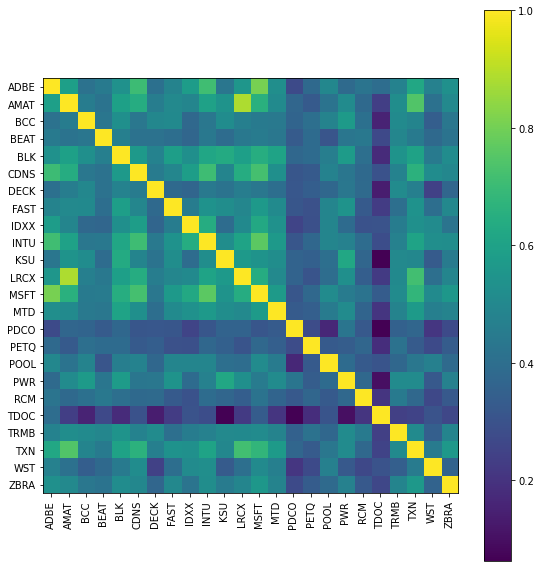

In [122]:
plotting.plot_covariance(cr, plot_correlation=True)
plt.show()

In [123]:
# Covariance Matrix
S

,ADBE,AMAT,BCC,BEAT,BLK,CDNS,DECK,FAST,IDXX,INTU,...,PDCO,PETQ,POOL,PWR,RCM,TDOC,TRMB,TXN,WST,ZBRA
ADBE,0.138195,0.101070,0.068815,0.081956,0.067930,0.093996,0.065480,0.058643,0.071633,0.092341,...,0.045881,0.084464,0.061609,0.050262,0.081652,0.084865,0.070089,0.080117,0.054389,0.084770
AMAT,0.101070,0.210196,0.093245,0.095239,0.093116,0.105418,0.090893,0.075974,0.074318,0.096106,...,0.076684,0.089204,0.063932,0.082589,0.091577,0.062509,0.094118,0.118164,0.057948,0.099294
BCC,0.068815,0.093245,0.198338,0.094596,0.080476,0.069074,0.095368,0.074311,0.056084,0.067606,...,0.072822,0.106582,0.071500,0.089380,0.094208,0.039758,0.089901,0.074540,0.047072,0.083025
BEAT,0.081956,0.095239,0.094596,0.243193,0.078586,0.073810,0.088591,0.064918,0.060934,0.075271,...,0.073329,0.113582,0.050703,0.074863,0.112358,0.076510,0.095975,0.076701,0.057843,0.088466
BLK,0.067930,0.093116,0.080476,0.078586,0.115652,0.069517,0.070394,0.065828,0.059829,0.073316,...,0.057371,0.078411,0.052304,0.069020,0.071407,0.034589,0.073131,0.070827,0.046434,0.075475
CDNS,0.093996,0.105418,0.069074,0.073810,0.069517,0.128189,0.070016,0.058076,0.069307,0.088623,...,0.050527,0.069514,0.057056,0.054140,0.071405,0.061603,0.067524,0.082030,0.057064,0.075964
DECK,0.065480,0.090893,0.095368,0.088591,0.070394,0.070016,0.185877,0.054322,0.052665,0.066273,...,0.061265,0.087309,0.053956,0.065761,0.086741,0.034344,0.087161,0.069578,0.032448,0.068833
FAST,0.058643,0.075974,0.074311,0.064918,0.065828,0.058076,0.054322,0.107708,0.049766,0.061772,...,0.046232,0.057504,0.053406,0.062656,0.055720,0.043638,0.052576,0.061159,0.040363,0.070204
IDXX,0.071633,0.074318,0.056084,0.060934,0.059829,0.069307,0.052665,0.049766,0.110129,0.074455,...,0.038177,0.057255,0.054154,0.045482,0.051626,0.057915,0.059473,0.060882,0.052324,0.060445
INTU,0.092341,0.096106,0.067606,0.075271,0.073316,0.088623,0.066273,0.061772,0.074455,0.121830,...,0.049206,0.077678,0.056943,0.058071,0.071716,0.057210,0.065405,0.073233,0.056223,0.078169


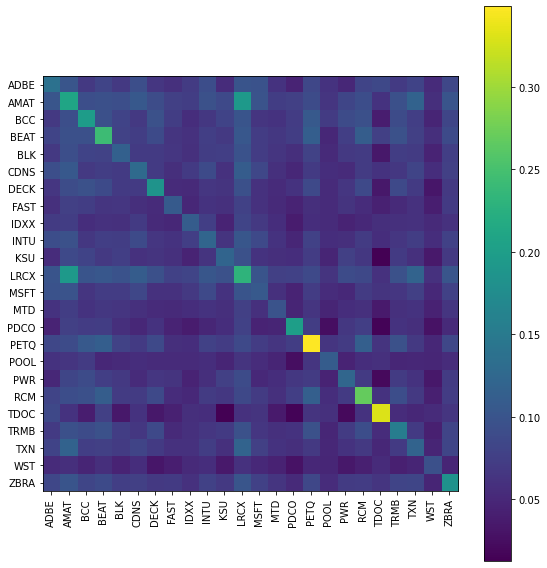

In [125]:
plt.rcParams['figure.figsize'] = (8.0, 8.0) # unit is inches
plotting.plot_covariance(S);

In [85]:
pf = build_portfolio(data=market_prices)
pf.data.head()

,ADBE,AMAT,BCC,BEAT,BLK,CDNS,DECK,FAST,IDXX,INTU,...,PDCO,PETQ,POOL,PWR,RCM,TDOC,TRMB,TXN,WST,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,177.699997,50.576756,34.555893,30.450001,469.751709,42.049999,80.250000,24.973570,157.809998,154.676865,...,32.553444,22.120001,127.088432,38.834106,4.43,36.200001,41.060001,96.645950,98.066849,103.709999
2018-01-03,181.039993,51.473106,35.090961,30.600000,474.707947,42.930000,79.349998,24.982727,162.050003,155.105667,...,31.994833,21.490000,126.952820,39.140900,4.23,36.849998,42.189999,99.264198,98.185112,105.769997
2018-01-04,183.220001,51.768707,34.868015,31.200001,480.974701,43.580002,78.959999,25.083467,163.960007,157.883057,...,32.201099,21.650000,127.931366,39.447693,4.15,37.200001,42.849998,99.136017,98.155556,107.860001
2018-01-05,185.339996,52.064312,35.715195,31.400000,485.072662,43.990002,78.959999,25.133831,166.600006,159.929581,...,32.381561,21.370001,128.086411,39.101315,4.19,37.500000,43.000000,99.895859,99.387543,109.540001
2018-01-08,185.039993,53.323009,36.651543,29.750000,488.690521,44.919998,80.970001,25.399414,165.080002,160.027023,...,32.467499,21.879999,127.388794,38.695557,4.22,36.049999,43.009998,100.371918,99.949333,110.629997


In [86]:
# 1. set the new value(s)
pf.freq = 252
pf.risk_free_rate = 0.1

# 2.a compute and get new values based on new freq/risk_free_rate
exret = pf.comp_expected_return(freq=252)
vol = pf.comp_volatility(freq=252)
sharpe = pf.comp_sharpe()
print(
    "For {} trading days and a risk free rate of {}:".format(pf.freq, pf.risk_free_rate)
)
print("Expected return: {:0.3f}".format(exret))
print("Volatility: {:0.3f}".format(vol))
print("Sharpe Ratio: {:0.3f}".format(sharpe))

# 2.b print out properties of portfolio (which is based on new freq/risk_free_rate)
pf.properties()

For 252 trading days and a risk free rate of 0.1:
Expected return: 0.370
Volatility: 0.275
Sharpe Ratio: 0.984
----------------------------------------------------------------------
Stocks: ADBE, AMAT, BCC, BEAT, BLK, CDNS, DECK, FAST, IDXX, INTU, KSU, LRCX, MSFT, MTD, PDCO, PETQ, POOL, PWR, RCM, TDOC, TRMB, TXN, WST, ZBRA
Time window/frequency: 252
Risk free rate: 0.1
Portfolio Expected Return: 0.370
Portfolio Volatility: 0.275
Portfolio Sharpe Ratio: 0.984

Skewness:
       ADBE      AMAT       BCC      BEAT       BLK      CDNS      DECK  \
0  0.928229  0.780266 -0.009258  0.600525  0.950733  0.793611  0.939867   

       FAST      IDXX      INTU  ...      PDCO      PETQ     POOL       PWR  \
0  0.778535  1.240162  0.288103  ...  0.958707  0.160698  1.14707  2.067019   

        RCM      TDOC      TRMB       TXN       WST      ZBRA  
0  1.131974  0.959814  1.290607  0.952732  1.108832  0.876837  

[1 rows x 24 columns]

Kurtosis:
       ADBE      AMAT       BCC      BEAT       BLK   

In [87]:
pf.ef_minimum_volatility(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.346
Annual Volatility: 0.237
Sharpe Ratio: 1.038

Optimal weights:
                    ADBE          AMAT           BCC  BEAT           BLK  \
Allocation  2.334650e-17  3.040832e-17  1.652932e-17   0.0  3.008281e-17   

            CDNS     DECK      FAST      IDXX          INTU  ...      PDCO  \
Allocation   0.0  0.03798  0.094742  0.070111  1.989341e-17  ...  0.096602   

            PETQ      POOL       PWR  RCM      TDOC          TRMB  \
Allocation   0.0  0.123401  0.057257  0.0  0.046003  3.150164e-17   

                     TXN       WST  ZBRA  
Allocation  3.807111e-17  0.270552   0.0  

[1 rows x 24 columns]
----------------------------------------------------------------------


,Allocation
ADBE,2.334650e-17
AMAT,3.040832e-17
BCC,1.652932e-17
BEAT,0.000000e+00
BLK,3.008281e-17
CDNS,0.000000e+00
DECK,3.797975e-02
FAST,9.474176e-02
IDXX,7.011078e-02
INTU,1.989341e-17


In [88]:
pf.ef_maximum_sharpe_ratio(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.576
Annual Volatility: 0.296
Sharpe Ratio: 1.612

Optimal weights:
                    ADBE          AMAT  BCC  BEAT  BLK  CDNS      DECK  \
Allocation  7.006844e-16  7.428782e-17  0.0   0.0  0.0   0.0  0.154911   

                    FAST     IDXX  INTU  ...  PDCO          PETQ      POOL  \
Allocation  6.021167e-17  0.10886   0.0  ...   0.0  2.211821e-16  0.017344   

                     PWR       RCM      TDOC          TRMB           TXN  \
Allocation  3.166810e-17  0.217794  0.217033  7.343343e-16  1.614859e-16   

                 WST      ZBRA  
Allocation  0.174213  0.109846  

[1 rows x 24 columns]
----------------------------------------------------------------------


,Allocation
ADBE,7.006844e-16
AMAT,7.428782e-17
BCC,0.000000e+00
BEAT,0.000000e+00
BLK,0.000000e+00
CDNS,0.000000e+00
DECK,1.549114e-01
FAST,6.021167e-17
IDXX,1.088596e-01
INTU,0.000000e+00


In [89]:
# optimisation for maximum Sharpe ratio
opt_weights = pf.ef_maximum_sharpe_ratio()

opt_weights[opt_weights['Allocation']> 0.01]

,Allocation
DECK,0.154911
IDXX,0.108860
POOL,0.017344
RCM,0.217794
TDOC,0.217033
WST,0.174213
ZBRA,0.109846


In [90]:

lst = opt_weights[opt_weights['Allocation']> 0.01].index.tolist()
lst

['DECK', 'IDXX', 'POOL', 'RCM', 'TDOC', 'WST', 'ZBRA']

In [91]:
pf = build_portfolio(data=market_prices[lst])
pf.data.head()

,DECK,IDXX,POOL,RCM,TDOC,WST,ZBRA
Date,,,,,,,
2018-01-02,80.250000,157.809998,127.088432,4.43,36.200001,98.066849,103.709999
2018-01-03,79.349998,162.050003,126.952820,4.23,36.849998,98.185112,105.769997
2018-01-04,78.959999,163.960007,127.931366,4.15,37.200001,98.155556,107.860001
2018-01-05,78.959999,166.600006,128.086411,4.19,37.500000,99.387543,109.540001
2018-01-08,80.970001,165.080002,127.388794,4.22,36.049999,99.949333,110.629997


In [92]:

pf.freq = 252
pf.risk_free_rate = 0.1


In [93]:
pf.ef_minimum_volatility(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.453
Annual Volatility: 0.254
Sharpe Ratio: 1.387

Optimal weights:
                DECK      IDXX      POOL       RCM      TDOC       WST  \
Allocation  0.123017  0.174131  0.199603  0.035605  0.031266  0.382282   

                ZBRA  
Allocation  0.054097  
----------------------------------------------------------------------


,Allocation
DECK,0.123017
IDXX,0.174131
POOL,0.199603
RCM,0.035605
TDOC,0.031266
WST,0.382282
ZBRA,0.054097


In [94]:
# optimisation for maximum Sharpe ratio
maximum_Sharpe_ratio = pf.ef_maximum_sharpe_ratio(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.576
Annual Volatility: 0.295
Sharpe Ratio: 1.612

Optimal weights:
                DECK      IDXX      POOL       RCM      TDOC       WST  \
Allocation  0.155114  0.109079  0.017249  0.217432  0.216824  0.174675   

                ZBRA  
Allocation  0.109626  
----------------------------------------------------------------------


In [95]:
# minimum volatility for a given target return of 0.26
minimum = pf.ef_efficient_return(0.5, verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Efficient Return

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.500
Annual Volatility: 0.261
Sharpe Ratio: 1.534

Optimal weights:
                DECK      IDXX      POOL       RCM      TDOC      WST  \
Allocation  0.135481  0.150308  0.128865  0.105247  0.102202  0.30241   

                ZBRA  
Allocation  0.075486  
----------------------------------------------------------------------


In [96]:
# maximum Sharpe ratio for a given target volatility of 0.22
maximum = pf.ef_efficient_volatility(0.26, verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Efficient Volatility

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.497
Annual Volatility: 0.260
Sharpe Ratio: 1.528

Optimal weights:
                DECK      IDXX      POOL     RCM     TDOC       WST      ZBRA
Allocation  0.134491  0.150326  0.134058  0.1013  0.09836  0.306861  0.074605
----------------------------------------------------------------------


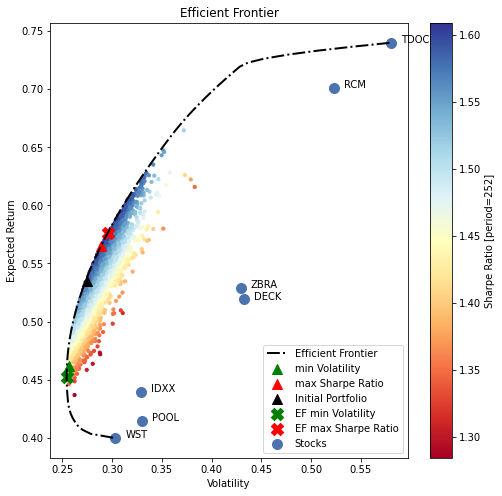

In [97]:
# Monte Carlo optimisation
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
pf.mc_plot_results()
# minimisation to compute efficient frontier and optimal portfolios along it
pf.ef_plot_efrontier()
pf.ef.plot_optimal_portfolios()
# plotting individual stocks
pf.plot_stocks()

In [98]:
market_prices[lst]

,DECK,IDXX,POOL,RCM,TDOC,WST,ZBRA
Date,,,,,,,
2018-01-02,80.250000,157.809998,127.088432,4.430000,36.200001,98.066849,103.709999
2018-01-03,79.349998,162.050003,126.952820,4.230000,36.849998,98.185112,105.769997
2018-01-04,78.959999,163.960007,127.931366,4.150000,37.200001,98.155556,107.860001
2018-01-05,78.959999,166.600006,128.086411,4.190000,37.500000,99.387543,109.540001
2018-01-08,80.970001,165.080002,127.388794,4.220000,36.049999,99.949333,110.629997
...,...,...,...,...,...,...,...
2020-12-24,292.739990,497.140015,364.730011,23.590000,207.949997,282.799316,376.890015
2020-12-28,290.929993,494.700012,362.760010,23.930000,197.830002,277.372406,382.589996
2020-12-29,287.450012,494.070007,364.040009,23.879999,198.979996,278.181946,378.040009


In [99]:
minimum.Allocation

DECK    0.135481
IDXX    0.150308
POOL    0.128865
RCM     0.105247
TDOC    0.102202
WST     0.302410
ZBRA    0.075486
Name: Allocation, dtype: float64

In [100]:
p_data = market_prices[lst]*maximum_Sharpe_ratio.Allocation
p_data.head()

,DECK,IDXX,POOL,RCM,TDOC,WST,ZBRA
Date,,,,,,,
2018-01-02,12.447902,17.213746,2.192200,0.963224,7.849045,17.129794,11.369363
2018-01-03,12.308299,17.676241,2.189861,0.919737,7.989981,17.150452,11.595194
2018-01-04,12.247805,17.884582,2.206740,0.902343,8.065870,17.145289,11.824313
2018-01-05,12.247805,18.172551,2.209414,0.911040,8.130917,17.360486,12.008486
2018-01-08,12.559584,18.006750,2.197381,0.917563,7.816521,17.458617,12.127978


In [101]:
p_data['Portfolio'] = p_data.apply(lambda x: x.sum(), axis=1)
p_data.head()

,DECK,IDXX,POOL,RCM,TDOC,WST,ZBRA,Portfolio
Date,,,,,,,,
2018-01-02,12.447902,17.213746,2.192200,0.963224,7.849045,17.129794,11.369363,69.165274
2018-01-03,12.308299,17.676241,2.189861,0.919737,7.989981,17.150452,11.595194,69.829765
2018-01-04,12.247805,17.884582,2.206740,0.902343,8.065870,17.145289,11.824313,70.276942
2018-01-05,12.247805,18.172551,2.209414,0.911040,8.130917,17.360486,12.008486,71.040699
2018-01-08,12.559584,18.006750,2.197381,0.917563,7.816521,17.458617,12.127978,71.084395


<AxesSubplot:xlabel='Date'>

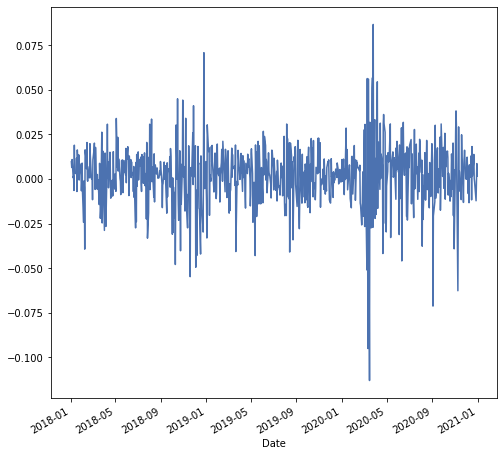

In [102]:
p_data['Portfolio'].pct_change().plot()

<AxesSubplot:>

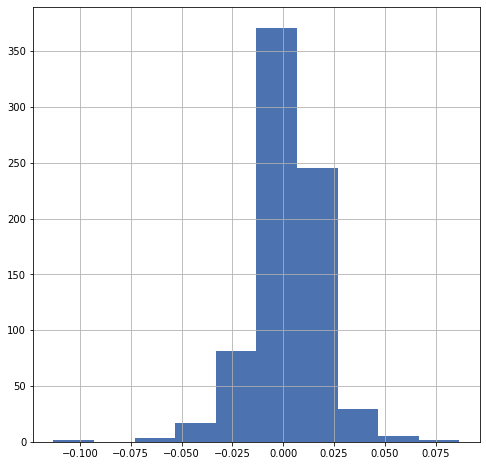

In [103]:
p_data['Portfolio'].pct_change().hist()

In [104]:
sp500 = prices['^GSPC'].to_frame()
sp500

,^GSPC
Date,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961
...,...
2020-12-24,3703.060059
2020-12-28,3735.360107
2020-12-29,3727.040039


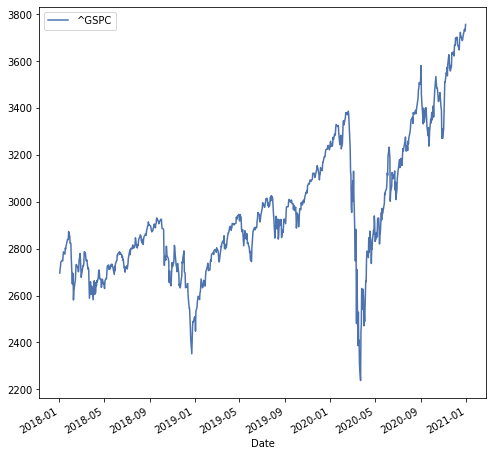

In [105]:
pf1 = build_portfolio(data=sp500)
pf1.data.plot()
pf1.freq = 252
pf1.risk_free_rate = 0.1

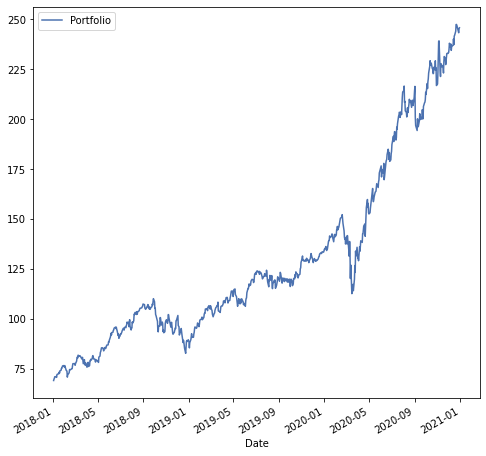

In [106]:
pf2 = build_portfolio(data=p_data['Portfolio'].to_frame())
pf2.data.plot()
pf2.freq = 252
pf2.risk_free_rate = 0.1

In [107]:
pf1.properties()

----------------------------------------------------------------------
Stocks: ^GSPC
Time window/frequency: 252
Risk free rate: 0.1
Portfolio Expected Return: 0.138
Portfolio Volatility: 0.233
Portfolio Sharpe Ratio: 0.163

Skewness:
      ^GSPC
0  0.737355

Kurtosis:
      ^GSPC
0  0.017822

Information:
   Allocation   Name
0         1.0  ^GSPC
----------------------------------------------------------------------


In [108]:
pf2.properties()

----------------------------------------------------------------------
Stocks: Portfolio
Time window/frequency: 252
Risk free rate: 0.1
Portfolio Expected Return: 0.460
Portfolio Volatility: 0.272
Portfolio Sharpe Ratio: 1.326

Skewness:
   Portfolio
0   1.020461

Kurtosis:
   Portfolio
0  -0.031531

Information:
   Allocation       Name
0         1.0  Portfolio
----------------------------------------------------------------------


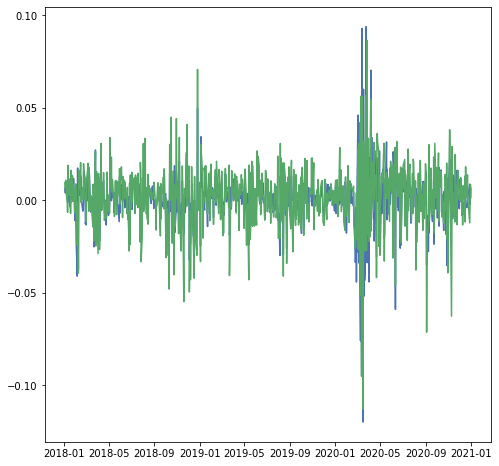

In [109]:
plt.plot(pf1.comp_daily_returns())
plt.plot(pf2.comp_daily_returns())

(array([  2.,   0.,   3.,  17.,  81., 371., 245.,  29.,   5.,   2.]),
 array([-0.11298177, -0.09302794, -0.07307412, -0.0531203 , -0.03316648,
        -0.01321265,  0.00674117,  0.02669499,  0.04664882,  0.06660264,
         0.08655646]),
 <BarContainer object of 10 artists>)

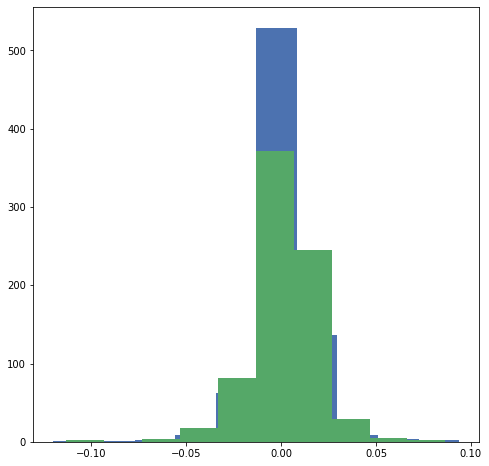

In [110]:
plt.hist(pf1.comp_daily_returns())
plt.hist(pf2.comp_daily_returns())

No handles with labels found to put in legend.


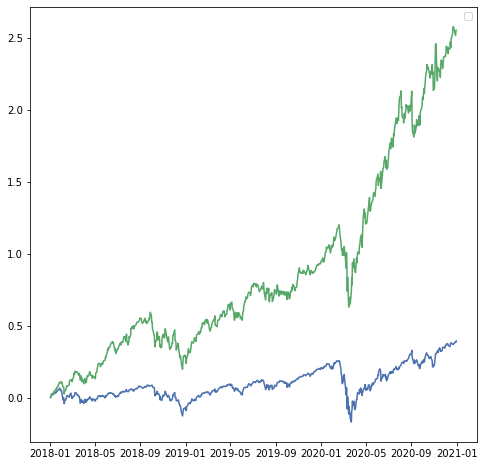

In [115]:
plt.plot(pf1.comp_cumulative_returns())
plt.plot(pf2.comp_cumulative_returns())
plt.legend()
plt.savefig('books_read.png')

In [112]:
pf1.comp_cumulative_returns().tail(1)

,^GSPC
Date,
2020-12-31,0.393299


In [113]:
pf2.comp_cumulative_returns().tail(1)

,Portfolio
Date,
2020-12-31,2.550987
